In [12]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [13]:
full = Table.read_table('nc-est2014-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [17]:
partial=full.select('SEX','AGE','POPESTIMATE2010','POPESTIMATE2014')
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [19]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [21]:
simple.sort('AGE', descending = True)

SEX,AGE,2010,2014
0,999,309347057,318857056
1,999,152089484,156936487
2,999,157257573,161920569
0,100,54409,72197
1,100,9351,13729
2,100,45058,58468
0,99,32178,41828
1,99,6104,9037
2,99,26074,32791
0,98,47037,60185


In [36]:
no_999 = simple.where('AGE',are.below(999))
no_999

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [37]:
females = no_999.where('SEX',2).drop(0)
females

AGE,2010,2014
0,1932910,1930493
1,1937556,1938870
2,2002177,1935270
3,2010648,1956572
4,1993240,1959950
5,1988080,1961391
6,1993603,2024024
7,1979908,2031760
8,1971142,2014402
9,2018378,2009560


In [47]:
males.sort('2014',descending = True)

AGE,2010,2014
23,2151095,2399883
24,2161380,2391398
22,2188228,2367842
21,2241095,2310734
25,2177171,2295836
20,2331846,2269570
54,2091677,2242828
26,2102375,2240026
19,2334906,2220790
53,2170965,2219617


In [38]:
males = no_999.where('SEX', 1).drop(0)
males

AGE,2010,2014
0,2018420,2017857
1,2020332,2023253
2,2088685,2022502
3,2101272,2048618
4,2084312,2043498
5,2076573,2043467
6,2079410,2110328
7,2063139,2122240
8,2054462,2105122
9,2107037,2097272


In [39]:
everyone = no_999.where('SEX', 0).drop(0)
everyone

AGE,2010,2014
0,3951330,3948350
1,3957888,3962123
2,4090862,3957772
3,4111920,4005190
4,4077552,4003448
5,4064653,4004858
6,4073013,4134352
7,4043047,4154000
8,4025604,4119524
9,4125415,4106832


In [54]:
pop_2014 = Table().with_columns('Age', males.column('AGE'),
                              'Males', males.column('2014'),
                              'Females', females.column('2014'))
pop_2014

Age,Males,Females
0,2017857,1930493
1,2023253,1938870
2,2022502,1935270
3,2048618,1956572
4,2043498,1959950
5,2043467,1961391
6,2110328,2024024
7,2122240,2031760
8,2105122,2014402
9,2097272,2009560


In [58]:
percent_females=pop_2014.column('Females')*100/(pop_2014.column('Males')+
                                           pop_2014.column('Females'))

In [75]:
counts_n_percent = pop_2014.with_column('Percent Females', percent_females)
counts_n_percent

Age,Males,Females,Percent Females
0,2017857,1930493,48.8937
1,2023253,1938870,48.9351
2,2022502,1935270,48.898
3,2048618,1956572,48.8509
4,2043498,1959950,48.9565
5,2043467,1961391,48.9753
6,2110328,2024024,48.9563
7,2122240,2031760,48.9109
8,2105122,2014402,48.8989
9,2097272,2009560,48.9321


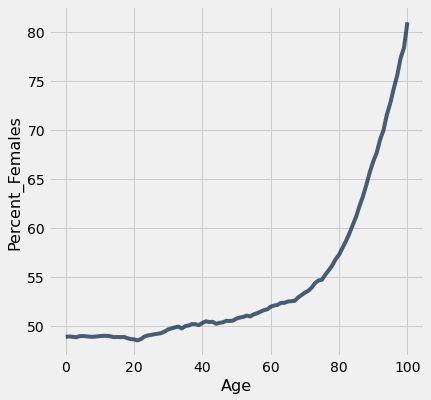

In [73]:
counts_n_percent.plot('Age', 'Percent_Females')

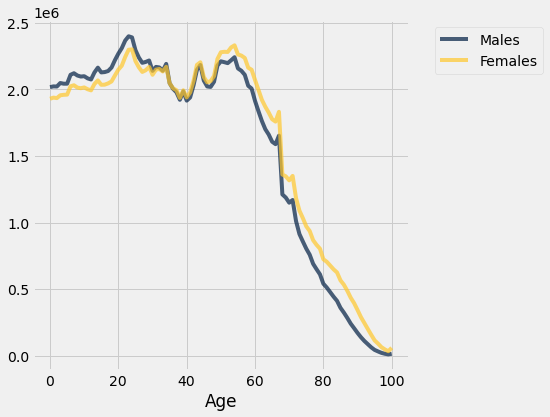

In [76]:
plot_table = counts_n_percent.select('Age', 'Males', 'Females')
plot_table.plot('Age')